In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from statistics import correlation, quantile

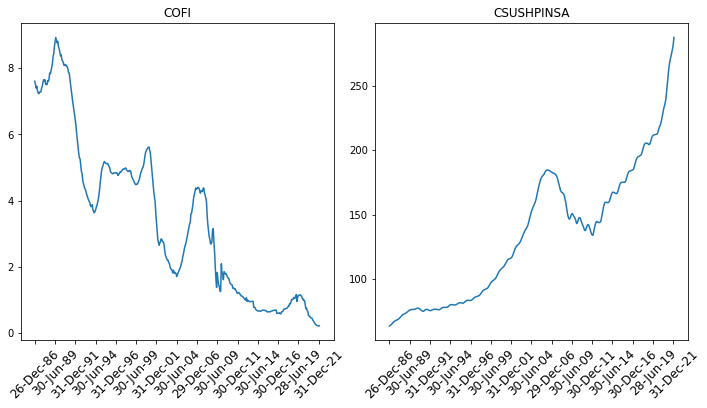

In [2]:
# Data of S&P/Case-Shiller U.S. National Home Price Index
# https://fred.stlouisfed.org/series/CSUSHPINSA
 
# Compate to The Federal Home Loan Bank of San Francisco's 11th District Monthly Weighted Average Cost of Funds Index (COFI) 
# https://www.fhlbsf.com/resources/cofi

df = pd.read_csv('housingData.csv')
#print(df)

COFI = df['Index Value']
CSUSHPINSA = df['CSUSHPINSA']
dates = df['Date Announced']

ind = [i for i in range(0,len(dates),30)]
labs = [m for i,m in enumerate(dates) if i in ind]

fig, ax = plt.subplots(1, 2,figsize=(10,5))
fig.tight_layout()
ax[0].plot(COFI)
ax[0].title.set_text("COFI")
ax[0].set_xticks(ind) 
ax[0].set_xticklabels(labs, fontsize=12, rotation=45)
ax[1].plot(CSUSHPINSA)
ax[1].title.set_text("CSUSHPINSA")
ax[1].set_xticks(ind) 
ax[1].set_xticklabels(labs, fontsize=12, rotation=45)
plt.show()


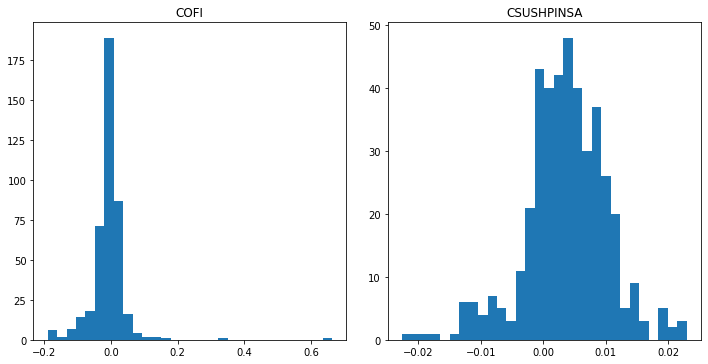

In [3]:
X = [(COFI[t+1]-COFI[t])/COFI[t] for t in range(len(COFI)-1)]
Y = [(CSUSHPINSA[t+1]-CSUSHPINSA[t])/CSUSHPINSA[t] for t in range(len(COFI)-1)]

fig, ax = plt.subplots(1, 2,figsize=(10,5))
fig.tight_layout()
ax[0].hist(X,30)
ax[0].title.set_text("COFI")
ax[1].hist(Y,30)
ax[1].title.set_text("CSUSHPINSA")
plt.show()


# Original Data:

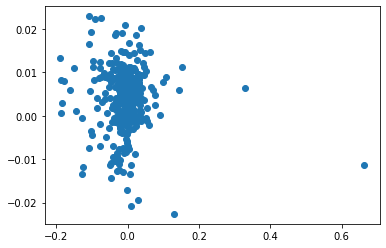

In [4]:
plt.scatter(X,Y)
plt.show()

In [5]:
rho_0 = correlation(X,Y)
print('zero lag=',rho_0)
rho_1 = correlation(X[:-1],Y[1:])
print('1 lag, COFI predict=',rho_1)
rho_2 = correlation(X[:-2],Y[2:])
print('2 lag, COFI predict=',rho_2)
rho_1 = correlation(X[1:],Y[:-1])
print('1 lag, CSUSHPINSA predict=',rho_1)
rho_2 = correlation(X[2:],Y[:-2])
print('2 lag, CSUSHPINSA predict=',rho_2)

zero lag= -0.07147997426276462
1 lag, COFI predict= -0.1223979943520158
2 lag, COFI predict= -0.07281660928674163
1 lag, CSUSHPINSA predict= -0.0017137858870142784
2 lag, CSUSHPINSA predict= 0.044203422760205544


# Winsorized Data:

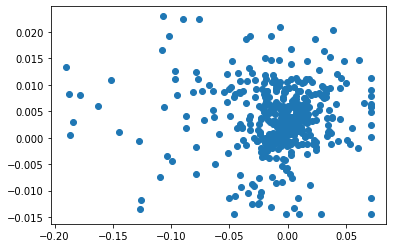

In [6]:
def windsorize(xs: List[float],p_down: float, p_up: float)->List[float]:
    assert p_up >= 0 and p_up<=1
    assert p_down >= 0 and p_down<=1
    assert p_up > p_down 
    
    if p_up < 1:
        q_up = quantile(xs,p_up)
    else:
        q_up = max(xs)
    if p_down>0:   
        q_down = quantile(xs,p_down)
    else:
        q_down = min(xs)
    
    return [max(min(x,q_up),q_down) for x in xs]

tildeX = windsorize(X,0,.975)
tildeY = windsorize(Y,.01,1)

plt.scatter(tildeX,tildeY)
plt.show()

In [7]:
rho_0 = correlation(tildeX,tildeY)
print('zero lag=',rho_0)
rho_1 = correlation(tildeX[:-1],tildeY[1:])
print('1 lag, COFI predict=',rho_1)
rho_2 = correlation(tildeX[:-2],tildeY[2:])
print('2 lag, COFI predict=',rho_2)
rho_1 = correlation(tildeX[1:],tildeY[:-1])
print('1 lag, CSUSHPINSA predict=',rho_1)
rho_2 = correlation(tildeX[2:],tildeY[:-2])
print('2 lag, CSUSHPINSA predict=',rho_2)

zero lag= -0.014977640603295508
1 lag, COFI predict= -0.05449303335847428
2 lag, COFI predict= -0.06539443473329823
1 lag, CSUSHPINSA predict= 0.04341349589598836
2 lag, CSUSHPINSA predict= 0.08400400139476875


# Truncated Data:

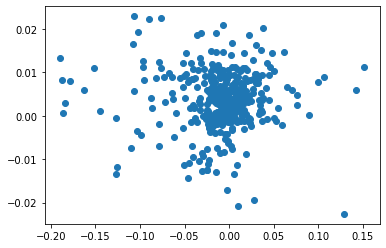

In [8]:
outlier1 = X.index(sorted(X)[-1])
outlier2 = X.index(sorted(X)[-2])
tildeX = [x for i,x in enumerate(X) if i!=outlier1 and i!=outlier2 ]
tildeY = [y for i,y in enumerate(Y) if i!=outlier1 and i!=outlier2 ]

plt.scatter(tildeX,tildeY)
plt.show()

In [9]:
rho_0 = correlation(tildeX,tildeY)
print('zero lag=',rho_0)
rho_1 = correlation(tildeX[:-1],tildeY[1:])
print('1 lag, COFI predict=',rho_1)
rho_2 = correlation(tildeX[:-2],tildeY[2:])
print('2 lag, COFI predict=',rho_2)
rho_1 = correlation(tildeX[1:],tildeY[:-1])
print('1 lag, CSUSHPINSA predict=',rho_1)
rho_2 = correlation(tildeX[2:],tildeY[:-2])
print('2 lag, CSUSHPINSA predict=',rho_2)

zero lag= -0.018297658941937515
1 lag, COFI predict= -0.04628316980558445
2 lag, COFI predict= -0.04876529186725578
1 lag, CSUSHPINSA predict= 0.038759185089817697
2 lag, CSUSHPINSA predict= 0.0855295777115319
